<a href="https://colab.research.google.com/github/SurekhaBerlin/NPower-Python-Practices/blob/main/ExploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis**


In this notebook, we get to work with the cleaned dataset from the previous notebook.

Now, we will perform the task of exploratory data analysis.

We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


In this notebook, we will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


We import the pandas module.


In [7]:
import pandas as pd

Then, we load the dataset into a dataframe.


In [8]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Identifying the Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [9]:
df.shape

(11398, 85)

In [10]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [11]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

We plot the distribution curve for the column `ConvertedComp`.


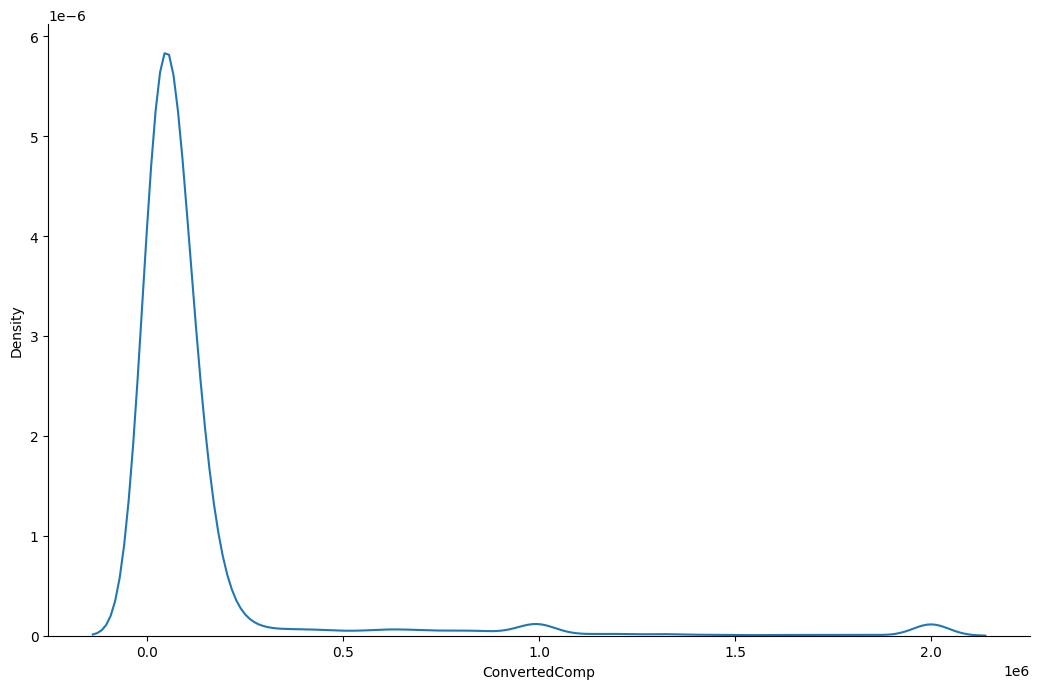

In [12]:
sns.displot(df['ConvertedComp'], kind="kde", height=7, aspect = 1.5)

We plot the histogram for the column `ConvertedComp`.


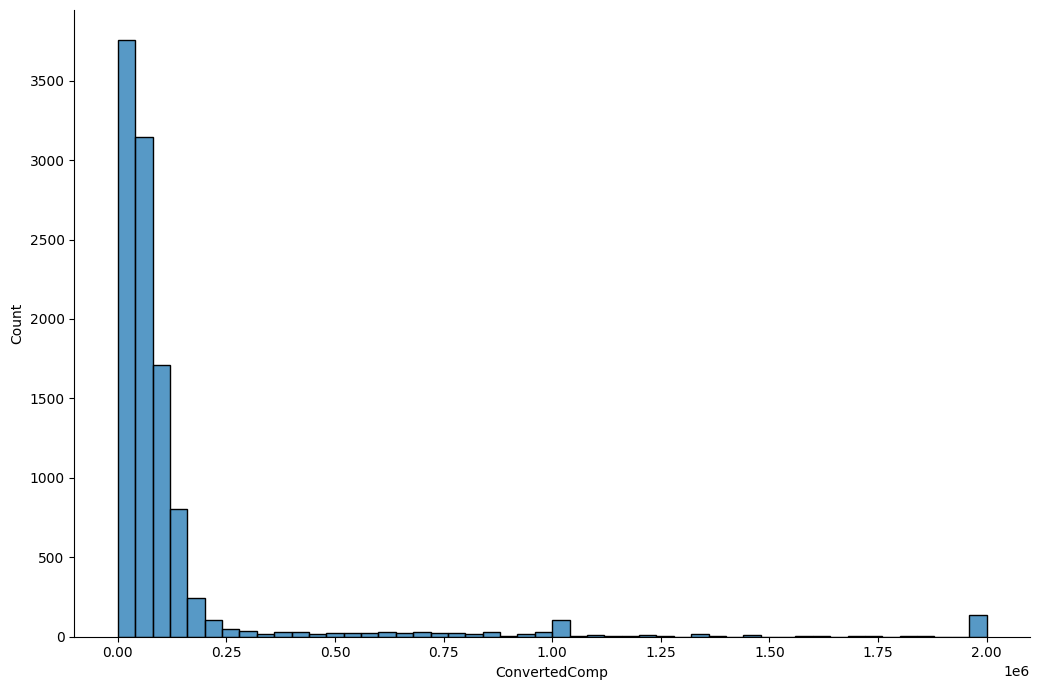

In [13]:
sns.displot(df['ConvertedComp'],bins=50, height=7, aspect = 1.5)

What is the median of the column `ConvertedComp`?


In [14]:
df['ConvertedComp'].describe()

,ConvertedComp
count,1.058200e+04
mean,1.315967e+05
std,2.947865e+05
min,0.000000e+00
25%,2.686800e+04
50%,5.774500e+04
75%,1.000000e+05
max,2.000000e+06


We can see the median is 57745 as it is equal to the 50th percentile

How many responders identified themselves only as a **Man**?


In [15]:
df['Gender'].value_counts()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


On total, 10480 responders identified themselves only as a Man

We can also find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [16]:
df['ConvertedComp'][(df.Gender == 'Woman')].describe()

,ConvertedComp
count,6.790000e+02
mean,1.011031e+05
std,2.202510e+05
min,0.000000e+00
25%,2.654650e+04
50%,5.770800e+04
75%,9.500000e+04
max,2.000000e+06


Give the five number summary for the column `Age`. Taking into account that min,q1,median,q3,max of a column are its five number summary.

In [17]:
df['Age'].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


We plot a histogram of the column `Age`.


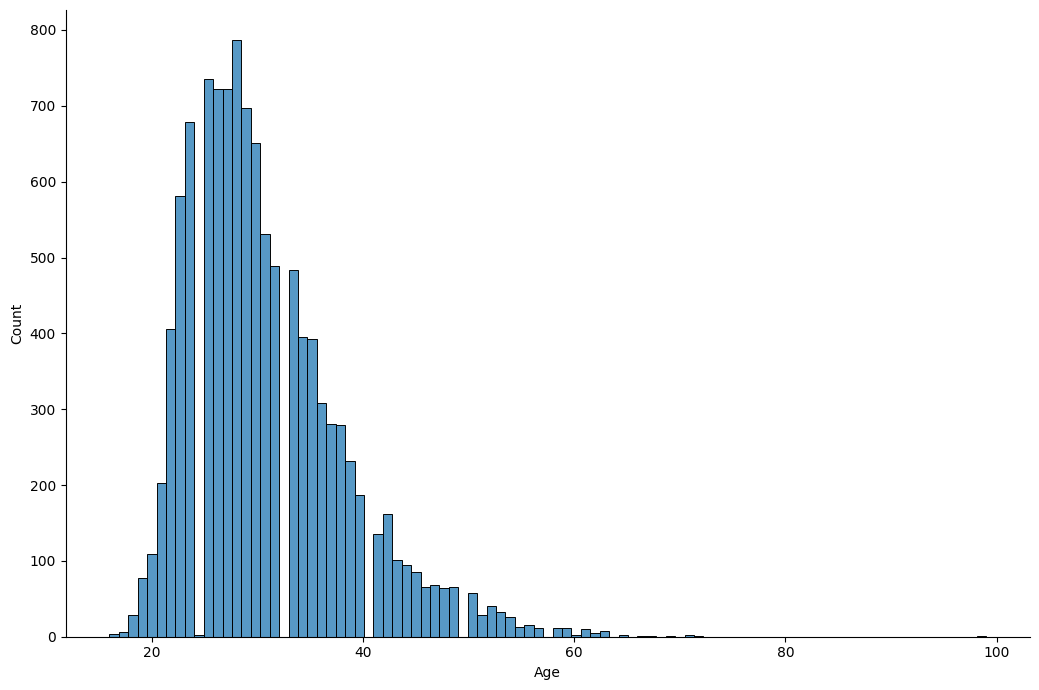

In [18]:
sns.displot(df['Age'], height=7, aspect = 1.5)

## Findin Outliers


We find out if outliers exist in the column `ConvertedComp` using a box plot


<Axes: xlabel='ConvertedComp'>

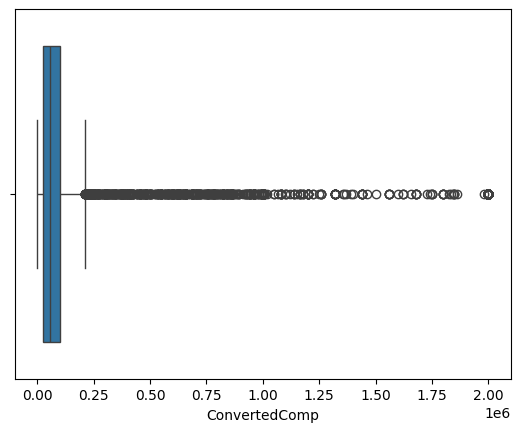

In [19]:
sns.boxplot(data=df['ConvertedComp'], orient = 'h')

We can find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

print('Q1', q1)
print('Q3', q3)

IQR = q3 - q1
print('IQR', IQR)

Q1 26868.0
Q3 100000.0
IQR 73132.0


We find out the upper and lower bounds.


In [21]:
up_bound = q3 + IQR*1.5
print('Upper bound:', up_bound)

lw_bound = q1 - IQR*1.5
print('Lower bound:', lw_bound)


Upper bound: 209698.0
Lower bound: -82830.0


With these calculations we are able to identify how many outliers are there in the `ConvertedComp` column.


In [22]:
num_outliers = 0

for conv_comp in df['ConvertedComp']:
    if (conv_comp < lw_bound) or (conv_comp > up_bound):
        num_outliers = num_outliers + 1

num_outliers

879

What is the median ConvertedComp before removing outliers?

In [23]:
df['ConvertedComp'].quantile(0.5)

np.float64(57745.0)

We now can create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
outl_index = df[(df.ConvertedComp < lw_bound) | (df.ConvertedComp > up_bound)].index

df_outl = df.drop(outl_index)
df_outl.shape

(10519, 85)

In [25]:
df_outl.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Finding Correlation


We can find the correlation between `Age` and all other numerical columns.


In [28]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number')

# Compute correlation with Age
correlation_with_age = numerical_cols.corr()['Age'].sort_values(ascending=False)
print(correlation_with_age)

Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64
